In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from rdkit import Chem as rkc
from rdkit.Chem import Draw
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit.Chem.Draw import IPythonConsole
import pandas as pd
from IPython.display import SVG

In [2]:
df = pd.read_csv('D:\Research\A2B\Molecules\mmgbsa_smiles.csv')
smis_li = df['Smiles'].tolist()
mols = [rkc.MolFromSmiles(smi) for smi in smis_li]

smi_scaffolds = list(set([MurckoScaffold.MurckoScaffoldSmiles(mol=mol, includeChirality=False) for mol in mols]))
mol_scaffolds = [rkc.MolFromSmiles(smi_scaffold) for smi_scaffold in smi_scaffolds]

In [3]:
with open(r'D:\Research\A2B\Molecules\cluster\admetprediction.smi','r') as fi:
    smis_li = fi.read().split('\n')

mols = [rkc.MolFromSmiles(smi) for smi in smis_li if smi != '']

smi_scaffolds = list(set([MurckoScaffold.MurckoScaffoldSmiles(mol=mol, includeChirality=False) for mol in mols]))
mol_scaffolds = [rkc.MolFromSmiles(smi_scaffold) for smi_scaffold in smi_scaffolds]

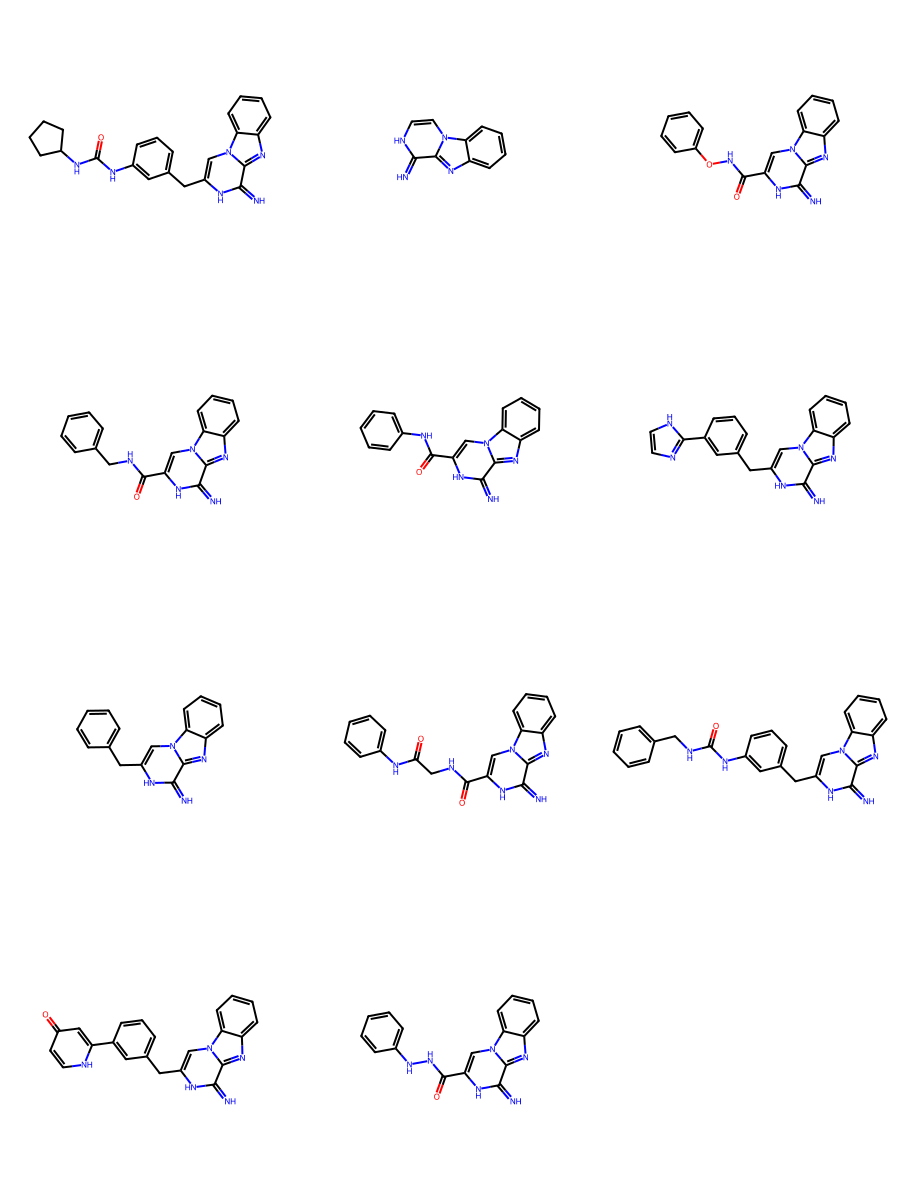

In [22]:
img = Draw.MolsToGridImage(mol_scaffolds, subImgSize=(300,300),useSVG=True,returnPNG=True)
img

In [5]:
scaffolds = [MurckoScaffold.MurckoScaffoldSmiles(mol=mol, includeChirality=False) for mol in mols]
df['Scaffold'] = scaffolds
df.to_csv('D:\Research\A2B\Molecules\mmgbsa_smiles.csv',mode='w', index=False)

ValueError: Length of values (26) does not match length of index (30)

In [ ]:
cluster_result ={}

cluster_alllist = [(MurckoScaffold.MurckoScaffoldSmiles(mol=mol, includeChirality=False),rkc.MolToSmiles(mol)) for mol in mols]
for sca in scaffolds:
    ScaffoldinSmiles = [pair[-1] for pair in cluster_alllist if sca == pair[0]]
    cluster_result[sca] = ScaffoldinSmiles

cluster_result

{'c1ccc2c(c1)nc1cnccn12': ['C[C@@H](O)CNC(=O)c1cn2c(nc3cc(C(F)(F)F)ccc32)c(N)n1',
  'Nc1nc(C(=O)NCCO)cn2c1nc1cc(C(F)(F)F)ccc12',
  'C[NH+](C)CCNC(=O)c1cn2c(nc3cc(C(F)(F)F)ccc32)c(N)n1',
  'CC[N@@H+](C)CCNC(=O)c1cn2c(nc3cc(C(F)(F)F)ccc32)c(N)n1',
  'Cc1ccc2c(c1)nc1c(N)nc(C(=O)N[C@H](C)CO)cn12'],
 'O=C(Nc1cccc(Cc2cn3c(cn2)nc2ccccc23)c1)NC1CCCC1': ['Nc1nc(Cc2cccc(NC(=O)NC3CCCC3)c2)cn2c1nc1cc(F)ccc12'],
 'O=C(NCc1ccccc1)c1cn2c(cn1)nc1ccccc12': ['Nc1nc(C(=O)NCc2ccccc2O)cn2c1nc1cc(C(F)(F)F)ccc12',
  'CCCc1ccc2c(c1)nc1c(N)nc(C(=O)NCc3ccccc3OC)cn12'],
 'c1ccc(Cc2cn3c(cn2)nc2ccccc23)cc1': ['Nc1nc(Cc2cccc(C(=O)NCCO)c2)cn2c1nc1cc(C(F)(F)F)ccc12',
  'C[C@@H](Nc1cccc(Cc2cn3c(nc4cc(C(F)(F)F)ccc43)c(N)n2)c1)C(F)(F)F',
  'CCNc1cccc(Cc2cn3c(nc4cc(C(F)(F)F)ccc43)c(N)n2)c1',
  'Nc1nc(Cc2cccc(CO)c2)cn2c1nc1cc(Br)ccc12',
  'Cc1ccc2c(c1)nc1c(N)nc(Cc3cccc(NO)c3)cn12',
  'CNC(=O)CNc1cccc(Cc2cn3c(nc4cc(C)ccc43)c(N)n2)c1',
  'Nc1nc(Cc2cccc(C(=O)NCCO)c2)cn2c1nc1cc(Br)ccc12',
  'Nc1nc(Cc2cccc(NCCO)c2)cn2c1nc1cc(C

In [ ]:
#Draw molecules
import os
filename = 'D:\Research\A2B\Molecules\cluster'

for sca in list(set(scaffolds)):
    newfile = filename + '\{}'.format(sca)
    os.mkdir(newfile)
    for num,smi in enumerate(cluster_result[sca]):
        mol = rkc.MolFromSmiles(smi)
        Draw.MolToFile(mol, newfile + '/'+ str(num) + ".png", size=(600, 600), legend=smi)